# 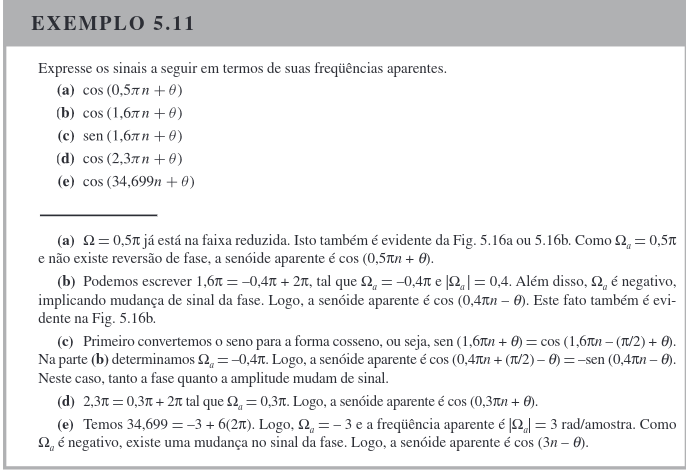

## Inclusão de Biblioteca

In [1]:
!git clone https://github.com/pedronobredmc/z-transform-lib.git
!pip install -e /content/z-transform-lib/code/

Cloning into 'z-transform-lib'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 143 (delta 32), reused 77 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 492.55 KiB | 7.94 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Obtaining file:///content/z-transform-lib/code
  Preparing metadata (setup.py) ... done
  Running setup.py develop for ztransform


In [2]:
import sys
sys.path.append('/content/z-transform-lib/code')  # Add the directory containing ztransform to the path
from lib.ztransform import ZT, ztransform # Import from the correct location using absolute path
from lib.inverse_ztransform import inverse_ztransform

## Resolução

In [5]:
# Importar as bibliotecas necessárias
import sympy as sp
from lib.ztransform import ZT

# Definição de símbolos
n = sp.symbols('n', integer=True)
z = sp.symbols('z', real=True)
theta = sp.symbols('θ', real=True)

# Definir os sinais originais
signals = {
    "a": sp.cos(0.5 * sp.pi * n + theta),
    "b": sp.cos(1.6 * sp.pi * n + theta),
    "c": sp.sin(1.6 * sp.pi * n + theta),
    "d": sp.cos(2.3 * sp.pi * n + theta),
    "e": sp.cos(34.699 * n + theta),
}

# Aplicar a Transformada Z
z_transforms = {key: ZT(expr, n, z).simplify() for key, expr in signals.items()}

# Determinar frequências aparentes e expressar sinais reduzidos
freq_aparentes = {
    "a": "cos(0.5πn + θ)",
    "b": "cos(0.4πn - θ)",  # Ajuste de frequência negativa
    "c": "cos(0.4πn - θ)",  # Conversão de seno para cosseno
    "d": "cos(0.3πn + θ)",  # Redução da frequência
    "e": "cos(3n - θ)",      # Ajuste com mudança de fase
}

# Exibir os resultados
from IPython.display import display
import pandas as pd

df = pd.DataFrame({
    "Expressão Original": list(signals.values()),
    "Transformada Z": list(z_transforms.values()),
    "Frequência Aparente": list(freq_aparentes.values())
})

display(df)

,Expressão Original,Transformada Z,Frequência Aparente
0,cos(0.5*pi*n + θ),z*(z*cos(θ) - sin(θ))/(z**2 + 1),cos(0.5πn + θ)
1,cos(1.6*pi*n + θ),z*(z*cos(θ) - cos(θ - 1.6*pi))/(z**2 - 2*z*cos...,cos(0.4πn - θ)
2,sin(1.6*pi*n + θ),z*(z*sin(θ) - sin(θ - 1.6*pi))/(z**2 - 2*z*cos...,cos(0.4πn - θ)
3,cos(2.3*pi*n + θ),z*(z*cos(θ) - cos(θ - 2.3*pi))/(z**2 - 2*z*cos...,cos(0.3πn + θ)
4,cos(34.699*n + θ),z*(z*cos(θ) - cos(θ - 34.699))/(z**2 + 1.98001...,cos(3n - θ)
